<font color='orange'>**DSBDAL Ass. 5 - Data Analytics II**</font><br/>

##### 1. Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.

#### **0. Loading the Dataset** :

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
df = pd.read_csv('5_Social_Network_Ads.csv')

In [185]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [186]:
df.isna().sum().sum()

0

#### **1. Label Encoding Gender column** :

In [187]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])

#### **2. Splitting the Dataset** :

In [188]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)
train_x, train_y = train.drop('Purchased', axis=1), train['Purchased']
test_x, test_y = test.drop('Purchased', axis=1), test['Purchased']

#### **2.1 Normalize the Dataset** :

In [189]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

#### **3. Model Training** :

In [190]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)
lr.score(test_x, test_y)

0.83

##### 2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

#### **4. Confusion Matrix** :

In [192]:
from sklearn.metrics import confusion_matrix
pred_y = lr.predict(test_x)
conf = confusion_matrix(test_y, pred_y)

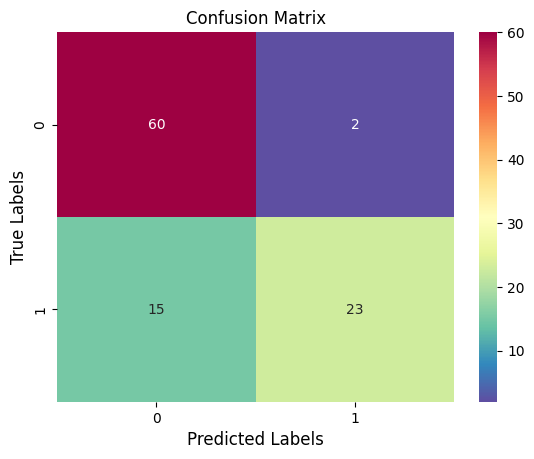

In [197]:
sns.heatmap(conf, cmap='Spectral_r', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Labels', size='large')
plt.xlabel('Predicted Labels', size='large');

#### **TP** :
##### Correctly predicted presence

In [200]:
tp = conf[0][0]

#### **TN** :
##### Correctly predicted absence

In [201]:
tn = conf[1][1]

#### **FP** :
##### Wrongly predicted presence

In [202]:
fp = conf[1][0]

#### **FN** :
##### Wrongly predicted absence


In [203]:
fn = conf[0][1]

#### **5. Accuracy** :

In [204]:
a = (tp+tn)/(tp+tn+fp+fn)
a

0.83

#### **5.1 Error Rate** : 

In [205]:
1 - a

0.17000000000000004

#### **6. Precision** :

In [206]:
p = (tp)/(tp+fp)
p

0.8

#### **7. Recall** :

In [207]:
r = (tp)/(tp+fn)
r

0.967741935483871

#### **8. F1 Score**:

In [208]:
2*p*r/(p+r)

0.8759124087591241

#### **9. Compare calculated values** : 

In [209]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [210]:
accuracy_score(test_y, pred_y)

0.83

In [211]:
precision_score(test_y, pred_y, average='micro')

0.83

In [212]:
recall_score(test_y, pred_y, average='micro')

0.83

In [213]:
f1_score(test_y, pred_y, average='micro')

0.83